# Boosting

## Carga de datasets

In [1]:
library(caret)
library(dplyr)
library(caretEnsemble)
library(mlbench)

digit_train <- read.csv("./train.csv")
digit_test <- read.csv("./test.csv")

digit_train$label <- as.factor(digit_train$label)

Loading required package: ggplot2



Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘caretEnsemble’


The following object is masked from ‘package:ggplot2’:

    autoplot




In [2]:
train_perc <- 0.75
train_index <- createDataPartition(digit_train$label,
                                   p = train_perc,
                                   list = FALSE)

data_train <- digit_train[train_index, ]
data_test <- digit_train[-train_index, ]

## Visualizamos el dataset

In [3]:
View(x = data_train)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,⋯,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
10,3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
11,8,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Entrenamiento

In [4]:
control <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(Sys.time())
metric <- "Accuracy"

### C5.0

In [11]:
grid <- expand.grid(trials = 20,
                    model = "tree",
                    winnow = FALSE)
if (file.exists("boosting_c50.rds")) {
  model_c50 <- readRDS(file = "boosting_c50.rds")
} else {
  model_c50 <- train(label ~ .,
                     data = data_train[1:1000, ],
                     method = "C5.0",
                     metric = metric,
                     tuneGrid = grid,
                     trControl = control)
  saveRDS(model_c50, file = "boosting_c50.rds")
}

### AdaBoost.M1

In [12]:
grid <- expand.grid(mfinal = 20,
                    maxdepth = 5,
                    coeflearn = c("Breiman"))
if (file.exists("boosting_adaboost.rds")) {
  model_adaboost <- readRDS(file = "boosting_adaboost.rds")
} else {
  model_adaboost <- train(label ~ .,
                          data = data_train[1:1000, ],
                          method = "AdaBoost.M1",
                          metric = metric,
                          tuneGrid = grid,
                          trControl = control)
  saveRDS(model_adaboost, file = "boosting_adaboost.rds")
}

### Boosted Linear Model

In [14]:
grid <- expand.grid(mstop = 20,
                    nu = 0.001)
if (file.exists("boosting_bstlm.rds")) {
  model_bstlm <- readRDS(file = "boosting_bstlm.rds")
} else {
  model_bstlm <- train(label ~ .,
                       data = data_train,
                       method = "BstLm",
                       metric = metric,
                       tuneGrid = grid,
                       trControl = control)
  saveRDS(model_bstlm, file = "boosting_bstlm.rds")
}

## Resultados


Call:
summary.resamples(object = results)

Models: c50, adaboost, bstlm 
Number of resamples: 30 

Accuracy 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
c50      0.7941176 0.8484848 0.8650000 0.8647134 0.8800000 0.9300000    0
adaboost 0.7346939 0.7682576 0.8009901 0.8045802 0.8379208 0.8910891    0
bstlm    0.1113225 0.1114020 0.1114640 0.1115132 0.1116663 0.1117815    0

Kappa 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
c50      0.7710560 0.8310963 0.8496932 0.8494053 0.8663622 0.9220316    0
adaboost 0.7047167 0.7420515 0.7786948 0.7825081 0.8195683 0.8789233    0
bstlm    0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000    0


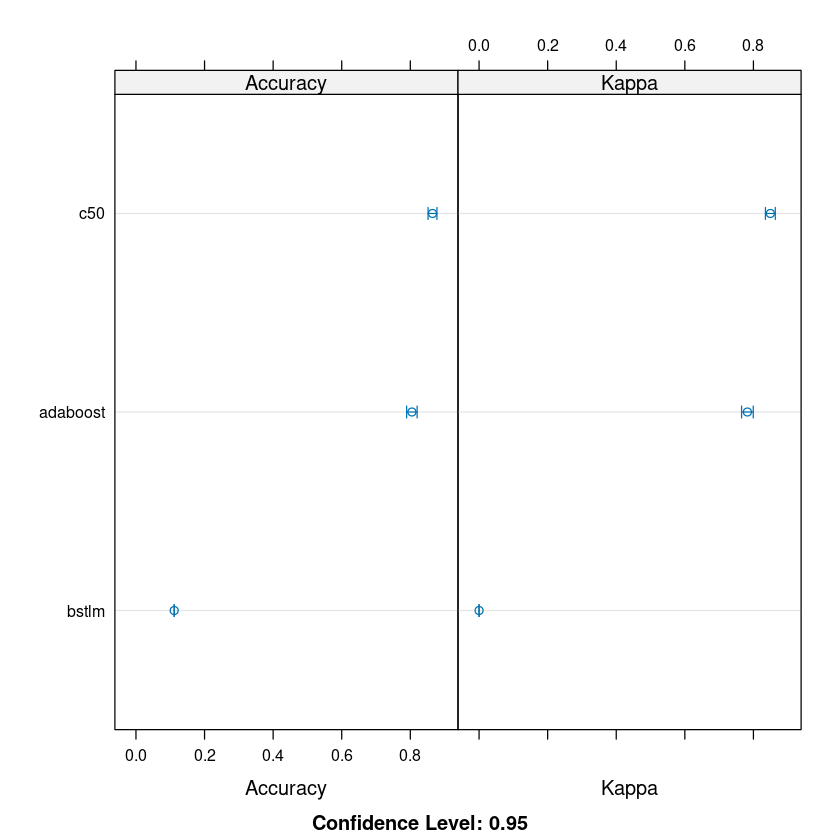

In [15]:
results <- resamples(list(c50 = model_c50,
                          adaboost = model_adaboost,
                          bstlm = model_bstlm))
summary(results)
dotplot(results)

## Test

### C5.0

In [16]:
pred_c50 <- predict(model_c50, data_test[1:1000, ])
conf_matrix_c50 <- table(data_test[1:1000, ]$label, pred_c50)

In [17]:
conf_matrix_c50
accuracy_c50 <- mean(pred_c50 == data_test[1:1000, ]$label)
cat("Accuracy with C5.0 boosting: ", accuracy_c50)

   pred_c50
      0   1   2   3   4   5   6   7   8   9
  0  82   0   0   0   0   0   1   0   0   0
  1   0 112   1   2   0   0   0   1   0   0
  2   3   2 102   0   1   0   4   1   5   1
  3   0   3   3  79   0   3   0   0   5   0
  4   0   0   1   0  83   2   1   1   1  12
  5   0   0   1   0   0  77   2   1   2   3
  6   7   3   1   0   4   1  86   0   5   0
  7   0   2   2   0   0   0   0  92   1   3
  8   1   3   3   2   2   5   1   0  87   6
  9   1   1   1   0   5   2   0   2   2  71

Accuracy with C5.0 boosting:  0.871

### AdaBoost.M1

In [18]:
pred_adaboost <- predict(model_adaboost, data_test[1:1000, ])
conf_matrix_adaboost <- table(data_test[1:1000, ]$label, pred_adaboost)

In [19]:
conf_matrix_adaboost
accuracy_adaboost <- mean(pred_adaboost == data_test[1:1000, ]$label)
cat("Accuracy with AdaBoost.M1 boosting: ", accuracy_adaboost)

   pred_adaboost
      0   1   2   3   4   5   6   7   8   9
  0  78   0   2   0   1   1   1   0   0   0
  1   0 112   0   0   0   1   0   3   0   0
  2   5   3  96   2   3   2   3   2   1   2
  3   4   1   4  69   0   7   0   0   2   6
  4   0   1   2   0  68   0   1   1   2  26
  5   0   0   1   4   2  68   3   2   2   4
  6   5   3   3   0   3   2  89   0   2   0
  7   0   2   6   0   1   0   0  81   1   9
  8   2   3   3   5   2   2   0   1  79  13
  9   1   0   1   2   5   1   0   4   0  71

Accuracy with AdaBoost.M1 boosting:  0.811

### Boosted Linear Model

In [20]:
pred_bstlm <- predict(model_bstlm, data_test)
conf_matrix_bstlm <- table(data_test$label, pred_bstlm)

In [21]:
conf_matrix_bstlm
accuracy_bstlm <- mean(pred_bstlm == data_test$label)
cat("Accuracy with Boosted Linear Model boosting: ", accuracy_bstlm)

   pred_bstlm
       0    1    2    3    4    5    6    7    8    9
  0    0 1033    0    0    0    0    0    0    0    0
  1    0 1171    0    0    0    0    0    0    0    0
  2    0 1044    0    0    0    0    0    0    0    0
  3    0 1087    0    0    0    0    0    0    0    0
  4    0 1018    0    0    0    0    0    0    0    0
  5    0  948    0    0    0    0    0    0    0    0
  6    0 1034    0    0    0    0    0    0    0    0
  7    0 1100    0    0    0    0    0    0    0    0
  8    0 1015    0    0    0    0    0    0    0    0
  9    0 1047    0    0    0    0    0    0    0    0

Accuracy with Boosted Linear Model boosting:  0.1115557

## Conclusión final

De las tres posibilidades de boosting, el método C5.0 es el que más precisión reporta (0.872)